# Are some train routes more likely to experience delays than others? Visualize and proof statistically.

In [ ]:
import src.data_processing.data as data
import numpy as np
import pandas as pd

In [8]:
trips = data.full_trips
trips[["Delay time"]].describe()

,Delay time
count,440943.000000
mean,132.252935
std,973.275448
min,0.000000
25%,0.000000
50%,31.000000
75%,123.000000
max,86399.000000


In [9]:
trips.sort_values(by = "Delay time" , ascending = False)

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure,Delay time
36675,36675,2020-09-22,2422,IC 18,SNCB/NMBS,125,2022-10-30 23:59:59,2022-10-30 23:59:59,2022-10-30 00:00:00,1899-12-30 00:00:00,IC 18: BRUSSEL-ZUID -> LIEGE-SAINT-LAMBERT,LEMAN,125,2020-09-23 00:00:00,2020-09-23,2020-09-22,2020-09-22,86399
43688,43688,2020-09-23,723,IC 04-1,SNCB/NMBS,59,2022-10-30 23:59:57,2022-10-30 00:04:03,2022-10-30 00:00:00,2022-10-30 00:02:00,IC 04-1: ANTWERPEN-CENTRAAL -> POPERINGE,SINT-NIKLAAS,59,2020-09-24,2020-09-24,2020-09-23,2020-09-24,86397
3041,3041,2020-09-26,1922,IC 06-1,SNCB/NMBS,36,2022-10-30 23:59:57,2022-10-30 00:06:36,2022-10-30 00:00:00,2022-10-30 00:04:00,IC 06-1: TOURNAI -> BRUSSELS AIRPORT - ZAVENTEM,BRUSSEL-NOORD,0/3,2020-09-27 00:00:00,2020-09-27,2020-09-26,2020-09-27,86397
54352,54352,2020-09-22,2294,L B3,SNCB/NMBS,89,2022-10-30 23:59:53,2022-10-30 00:00:37,2022-10-30 00:00:00,1899-12-30 00:00:00,L B3: DENDERMONDE -> ZOTTEGEM,EDE,89,2020-09-23 00:00:00,2020-09-23,2020-09-22,2020-09-23,86393
13498,13498,2020-09-23,2294,L B3,SNCB/NMBS,89,2022-10-30 23:59:53,2022-10-30 23:59:53,2022-10-30 00:00:00,1899-12-30 00:00:00,L B3: DENDERMONDE -> ZOTTEGEM,EDE,89,2020-09-24,2020-09-24,2020-09-23,2020-09-24,86393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10439,10439,2020-09-26,3312,IC 22,SNCB/NMBS,0/5,NaT,2022-10-30 12:29:16,NaT,2022-10-30 12:28:00,IC 22: BRUSSEL-ZUID -> ANTWERPEN-CENTRAAL,BRUSSEL-ZUID,NaN,NaN,2020-09-26,NaN,2020-09-26,0
10445,10445,2020-09-26,3312,IC 22,SNCB/NMBS,25,2022-10-30 12:46:53,2022-10-30 12:48:04,2022-10-30 12:47:00,2022-10-30 12:48:00,IC 22: BRUSSEL-ZUID -> ANTWERPEN-CENTRAAL,VILVOORDE,25,2020-09-26 00:00:00,2020-09-26,2020-09-26,2020-09-26,0
10446,10446,2020-09-26,4681,L 04,SNCB/NMBS,97,NaT,2022-10-30 10:55:44,NaT,2022-10-30 10:54:00,L 04: MONS -> QUIEVRAIN,MONS,NaN,NaN,2020-09-26,NaN,2020-09-26,0
10450,10450,2020-09-26,4862,L 29,SNCB/NMBS,90,NaT,2022-10-30 12:36:35,NaT,2022-10-30 12:36:00,L 29: GERAARDSBERGEN -> MONS,GERAARDSBERGEN,NaN,NaN,2020-09-26,NaN,2020-09-26,0


We delete all delay times > 85.000 seconds, which is equal to almost 24 hours.

In [10]:
trips = data.full_trips
for x in trips[['Delay time']]:
    trips.loc[trips[x] > 85000,x] = np.nan
trips[["Delay time"]].describe()

,Delay time
count,440894.000000
mean,122.681282
std,350.597353
min,0.000000
25%,0.000000
50%,31.000000
75%,123.000000
max,24536.000000


We assume that a train route is an array of subsequent train stops

In [11]:
train_numbers = trips["Train number"].unique()
routes = {}
for train_number in train_numbers:
    routes[train_number] = trips[trips["Train number"] == train_number].sort_values(by= [ "Time of real departure"])



We can use the train number as the key.

In [12]:
# we can use the train number as the key
routes.get(10)[['Date of departure', 'Train number','Time of real arrival', 'Time of planned arrival','Name of the stop', 'Delay time']]


,Date of departure,Train number,Time of real arrival,Time of planned arrival,Name of the stop,Delay time
6,2020-09-26,10,2022-10-30 20:26:47,2022-10-30 20:29:00,HERGENRATH,0.0
814,2020-09-25,10,2022-10-30 20:27:51,2022-10-30 20:29:00,HERGENRATH,0.0
25413,2020-09-21,10,2022-10-30 20:27:54,2022-10-30 20:29:00,HERGENRATH,0.0
36322,2020-09-22,10,2022-10-30 20:30:31,2022-10-30 20:29:00,HERGENRATH,91.0
21678,2020-09-23,10,2022-10-30 20:35:15,2022-10-30 20:29:00,HERGENRATH,375.0
...,...,...,...,...,...,...
14057,2020-09-20,10,2022-10-30 21:38:06,2022-10-30 21:35:00,BRUSSEL-ZUID,186.0
15356,2020-09-21,10,2022-10-30 21:34:57,2022-10-30 21:35:00,BRUSSEL-ZUID,0.0
768,2020-09-26,10,2022-10-30 21:33:24,2022-10-30 21:35:00,BRUSSEL-ZUID,0.0
844,2020-09-25,10,2022-10-30 21:36:35,2022-10-30 21:35:00,BRUSSEL-ZUID,95.0


Each routes value actually contains 7 times the same set of subsequent stops.

In [13]:
routes.get(10)["Name of the stop"].str.count("hergenrath").sum()

0

Create a dictionary so we can get the "number of delays/ total train stops" per route

In [14]:
# #for train_number in train_numbers:
#     routes[train_number]["Number of delays"] = len(routes.get(train_number)[routes.get(train_number)["Delay time"] > 0])
#     routes[train_number]["Total train stops"] = len(routes.get(train_number))
#     routes[train_number]["Number of delays/ Total train stops"] = routes[train_number]["Number of delays"]/routes[train_number]["Total train stops"]
# routes.get(10)
delay_occurences_per_route = {}
for train_number in train_numbers:
    delay_occurences_per_route [train_number]  = len(routes.get(train_number)[routes.get(train_number)["Delay time"] > 0])/len(routes.get(train_number))

delay_occurences_per_route.get(10)

0.6

In [15]:
delay_occurences_per_route_df = pd.DataFrame.from_dict(delay_occurences_per_route, orient ="index").reset_index().rename(columns = {"index": "Route", 0: "Delay_frequency"})
delay_occurences_per_route_df["Re"]  = delay_occurences_per_route_df.reset_index()["Route"].apply(lambda x: routes.get(x)["Direction of relation"].iloc[0])
delay_occurences_per_route_df

,Route,Delay_frequency,Re
0,11,0.816667,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF
1,116,0.380952,IC 33: LIERS -> LUXEMBOURG
2,110,0.585034,IC 33: LIERS -> LUXEMBOURG
3,112,0.435374,IC 33: LIERS -> LUXEMBOURG
4,113,0.551020,IC 33: LUXEMBOURG -> LIERS
...,...,...,...
4362,17204,0.941176,NaN
4363,17206,0.928571,NaN
4364,17209,0.975000,NaN
4365,9372,0.500000,THAL:BRUSSEL-ZUID -> PARIS-NORD


<AxesSubplot: ylabel='Frequency'>

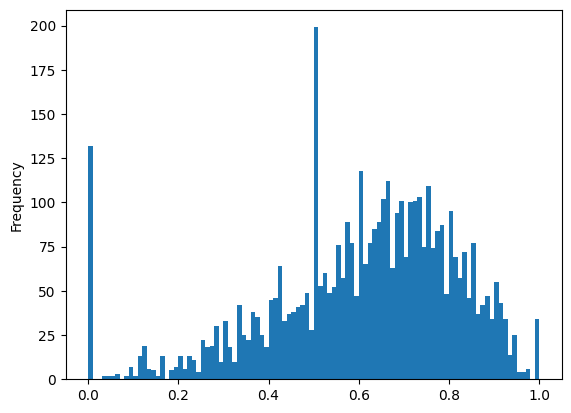

In [16]:
delay_occurences_per_route_df["Delay_frequency"].plot.hist(bins = 100)

<AxesSubplot: ylabel='Frequency'>

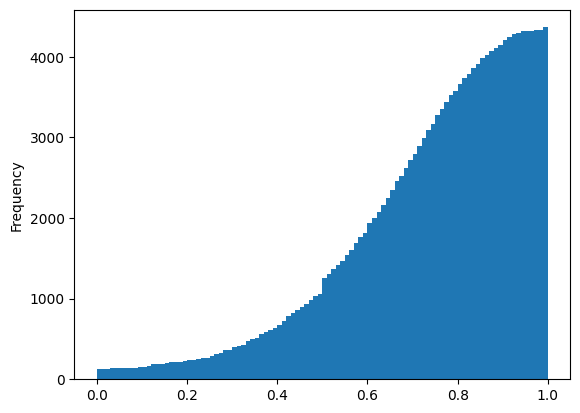

In [17]:
delay_occurences_per_route_df["Delay_frequency"].plot.hist(cumulative = True, bins = 100)

In [18]:
delay_occurences_per_route_df["Delay_frequency"].describe()

count    4367.000000
mean        0.608253
std         0.212123
min         0.000000
25%         0.500000
50%         0.642857
75%         0.758929
max         1.000000
Name: Delay_frequency, dtype: float64

Intriguing that train routes that always have delays are not considered outliers. All routes but the the train routes from the output below are more likely to experience delays. We can also see this by calculating the p value and z-score

In [19]:
def get_outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    print(iqr)
    outlier = df[(df[column] > q3 + 1.5 * iqr) | (df[column] < q1 - 1.5 * iqr)]
    print(outlier)
    return outlier

df = get_outlier(delay_occurences_per_route_df, "Delay_frequency")


0.2589285714285714
      Route  Delay_frequency                                     Re
66     4068         0.033333       L 31: JURBISE -> BRAINE-LE-COMTE
76     4081         0.033333       L 31: BRAINE-LE-COMTE -> JURBISE
88     4080         0.066667       L 31: BRAINE-LE-COMTE -> JURBISE
94     4083         0.100000       L 31: BRAINE-LE-COMTE -> JURBISE
305   19714         0.095238    IC 04-2: KORTRIJK -> LILLE FLANDRES
...     ...              ...                                    ...
4254  19212         0.000000         IC 42: QUEVY-FRONTIERE -> MONS
4323  12743         0.090909                                    NaN
4351  19706         0.000000    IC 04-2: KORTRIJK -> LILLE FLANDRES
4352  19705         0.000000    IC 04-2: LILLE FLANDRES -> KORTRIJK
4355   9382         0.052632  THAL:AMSTERDAM CENTRAAL -> PARIS-NORD

[164 rows x 3 columns]


In [20]:
import scipy.stats as stats
def calculate_z_score(df, column):
    df["z_score"] = (df[column] - df[column].mean()) / df[column].std(ddof=0)
    return df
def calculate_p_value(df):
    df["p_value"] = stats.norm.sf(abs(df["z_score"])) * 2
    return df

calculate_z_score(delay_occurences_per_route_df, "Delay_frequency")
pd.options.display.max_rows = 400000
calculate_p_value(delay_occurences_per_route_df)
delay_occurences_per_route_df

,Route,Delay_frequency,Re,z_score,p_value
0,11,0.816667,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,0.982625,0.325792
1,116,0.380952,IC 33: LIERS -> LUXEMBOURG,-1.071676,0.283865
2,110,0.585034,IC 33: LIERS -> LUXEMBOURG,-0.109474,0.912826
3,112,0.435374,IC 33: LIERS -> LUXEMBOURG,-0.815089,0.415021
4,113,0.551020,IC 33: LUXEMBOURG -> LIERS,-0.269841,0.787282
5,2083,0.613445,L B10-1: AALST -> BRUSSEL-ZUID,0.024479,0.980470
6,2092,0.714286,L B10-1: AALST -> BRUSSEL-ZUID,0.499920,0.617131
7,2437,0.703448,IC 18: LIEGE-SAINT-LAMBERT -> BRUSSEL-ZUID,0.448824,0.653559
8,2086,0.638655,L B10-1: AALST -> BRUSSEL-ZUID,0.143340,0.886022
9,2105,0.821053,IC 16-1: BRUSSEL-ZUID -> LUXEMBOURG,1.003304,0.315714


In [21]:
delay_occurences_per_route_df.sort_values(by = ["Delay_frequency","Re"], ascending=False)

,Route,Delay_frequency,Re,z_score,p_value
4160,9375,1.000000,THAL:PARIS-NORD -> AMSTERDAM CENTRAAL,1.847003,0.064747
4188,9448,1.000000,THAL:KOLN HBF -> PARIS-NORD,1.847003,0.064747
4124,9334,1.000000,THAL:AMSTERDAM CENTRAAL -> PARIS-NORD,1.847003,0.064747
4150,9891,1.000000,TGV:STRASBOURG-VILLE -> BRUSSEL-ZUID,1.847003,0.064747
3551,5937,1.000000,L 43: LUXEMBOURG -> ARLON,1.847003,0.064747
3578,5935,1.000000,L 43: LUXEMBOURG -> ARLON,1.847003,0.064747
3598,5926,1.000000,L 43: LUXEMBOURG -> ARLON,1.847003,0.064747
3646,5928,1.000000,L 43: LUXEMBOURG -> ARLON,1.847003,0.064747
1519,5840,1.000000,L 12: LUXEMBOURG -> ARLON,1.847003,0.064747
1542,5837,1.000000,L 12: LUXEMBOURG -> ARLON,1.847003,0.064747


Maybe get the mean delay frequency per Re

In [22]:
delay_occurences_per_route_df["test"] = delay_occurences_per_route_df.groupby("Re")["Delay_frequency"].transform("mean")
delays_per_relation = delay_occurences_per_route_df[["Re", "Delay_frequency"]]
delays_per_relation["avg_delay_freq"] = delays_per_relation.groupby("Re")["Delay_frequency"].transform("mean")
delays_per_relation = delays_per_relation.drop(columns = ["Delay_frequency"]).drop_duplicates()
delays_per_relation

/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_44716/3250347714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays_per_relation["avg_delay_freq"] = delays_per_relation.groupby("Re")["Delay_frequency"].transform("mean")


,Re,avg_delay_freq
0,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,0.736295
1,IC 33: LIERS -> LUXEMBOURG,0.559335
4,IC 33: LUXEMBOURG -> LIERS,0.536659
5,L B10-1: AALST -> BRUSSEL-ZUID,0.637542
7,IC 18: LIEGE-SAINT-LAMBERT -> BRUSSEL-ZUID,0.732769
9,IC 16-1: BRUSSEL-ZUID -> LUXEMBOURG,0.732007
11,IC 14: QUIEVRAIN -> LIEGE-GUILLEMINS,0.672799
17,IC 06-1: BRUSSELS AIRPORT - ZAVENTEM -> TOURNAI,0.632818
19,IC 03: GENK -> BLANKENBERGE,0.693255
33,L 36: ZOTTEGEM -> KORTRIJK,0.580556


In [23]:
delays_per_relation

,Re,avg_delay_freq
0,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,0.736295
1,IC 33: LIERS -> LUXEMBOURG,0.559335
4,IC 33: LUXEMBOURG -> LIERS,0.536659
5,L B10-1: AALST -> BRUSSEL-ZUID,0.637542
7,IC 18: LIEGE-SAINT-LAMBERT -> BRUSSEL-ZUID,0.732769
9,IC 16-1: BRUSSEL-ZUID -> LUXEMBOURG,0.732007
11,IC 14: QUIEVRAIN -> LIEGE-GUILLEMINS,0.672799
17,IC 06-1: BRUSSELS AIRPORT - ZAVENTEM -> TOURNAI,0.632818
19,IC 03: GENK -> BLANKENBERGE,0.693255
33,L 36: ZOTTEGEM -> KORTRIJK,0.580556


In [24]:
get_outlier(delays_per_relation, "avg_delay_freq")


0.1912476654968135
                                       Re  avg_delay_freq
305   IC 04-2: KORTRIJK -> LILLE FLANDRES        0.102309
886        IC 42: QUEVY-FRONTIERE -> MONS        0.221429
1082            L 42: ATHUS -> LUXEMBOURG        0.000000
1306            L 41: ATHUS -> LUXEMBOURG        0.000000
1404            L 12: ARLON -> LUXEMBOURG        0.000000
1595            L 43: ARLON -> LUXEMBOURG        0.000000
1684         IC 16-2: ARLON -> LUXEMBOURG        0.000000
1787         IC 16-2: LUXEMBOURG -> ARLON        0.226471


,Re,avg_delay_freq
305,IC 04-2: KORTRIJK -> LILLE FLANDRES,0.102309
886,IC 42: QUEVY-FRONTIERE -> MONS,0.221429
1082,L 42: ATHUS -> LUXEMBOURG,0.000000
1306,L 41: ATHUS -> LUXEMBOURG,0.000000
1404,L 12: ARLON -> LUXEMBOURG,0.000000
1595,L 43: ARLON -> LUXEMBOURG,0.000000
1684,IC 16-2: ARLON -> LUXEMBOURG,0.000000
1787,IC 16-2: LUXEMBOURG -> ARLON,0.226471


<AxesSubplot: ylabel='Frequency'>

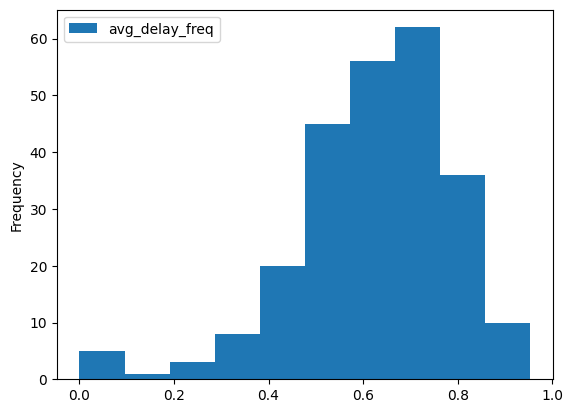

In [25]:
delays_per_relation.plot.hist()

In [26]:
routes.get(17209)

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure,Delay time
71790,71790,2020-09-25,17209,EXTRA,SNCB/NMBS,75,NaT,2022-10-30 20:16:29,NaT,2022-10-30 20:16:00,NaN,MOESKROEN,NaN,NaN,2020-09-25,NaN,2020-09-25,0.0
71793,71793,2020-09-25,17209,EXTRA,SNCB/NMBS,75,2022-10-30 20:23:37,2022-10-30 20:23:37,2022-10-30 20:19:00,2022-10-30 20:19:00,NaN,LAUWE,75,2020-09-25 00:00:00,2020-09-25,2020-09-25,2020-09-25,277.0
71796,71796,2020-09-25,17209,EXTRA,SNCB/NMBS,75,2022-10-30 20:28:00,2022-10-30 20:31:45,2022-10-30 20:25:00,2022-10-30 20:25:00,NaN,KORTRIJK,75,2020-09-25 00:00:00,2020-09-25,2020-09-25,2020-09-25,180.0
71907,71907,2020-09-25,17209,EXTRA,SNCB/NMBS,89,2022-10-30 20:38:49,2022-10-30 20:38:49,2022-10-30 20:31:00,2022-10-30 20:31:00,NaN,VICHTE,89,2020-09-25 00:00:00,2020-09-25,2020-09-25,2020-09-25,469.0
72491,72491,2020-09-25,17209,EXTRA,SNCB/NMBS,89,2022-10-30 20:42:49,2022-10-30 20:42:49,2022-10-30 20:35:00,2022-10-30 20:35:00,NaN,ANZEGEM,89,2020-09-25 00:00:00,2020-09-25,2020-09-25,2020-09-25,469.0
71909,71909,2020-09-25,17209,EXTRA,SNCB/NMBS,89,2022-10-30 20:52:38,2022-10-30 20:52:38,2022-10-30 20:40:00,2022-10-30 20:40:00,NaN,OUDENAARDE,89,2020-09-25 00:00:00,2020-09-25,2020-09-25,2020-09-25,758.0
71799,71799,2020-09-25,17209,EXTRA,SNCB/NMBS,89,2022-10-30 20:58:22,2022-10-30 20:58:22,2022-10-30 20:44:00,2022-10-30 20:44:00,NaN,SINT-DENIJS-BOEKEL,89,2020-09-25 00:00:00,2020-09-25,2020-09-25,2020-09-25,862.0
72492,72492,2020-09-25,17209,EXTRA,SNCB/NMBS,89,2022-10-30 20:59:24,2022-10-30 20:59:24,2022-10-30 20:45:00,2022-10-30 20:45:00,NaN,MUNKZWALM,89,2020-09-25 00:00:00,2020-09-25,2020-09-25,2020-09-25,864.0
71802,71802,2020-09-25,17209,EXTRA,SNCB/NMBS,89,2022-10-30 21:03:46,2022-10-30 21:03:46,2022-10-30 20:50:00,2022-10-30 20:50:00,NaN,ZOTTEGEM,89,2020-09-25 00:00:00,2020-09-25,2020-09-25,2020-09-25,826.0
71911,71911,2020-09-25,17209,EXTRA,SNCB/NMBS,89,2022-10-30 21:06:41,2022-10-30 21:06:41,2022-10-30 20:52:00,2022-10-30 20:52:00,NaN,HILLEGEM,89,2020-09-25 00:00:00,2020-09-25,2020-09-25,2020-09-25,881.0


In [27]:
delay_occurences_per_route_df[delay_occurences_per_route_df["p_value"] <0.05]

,Route,Delay_frequency,Re,z_score,p_value,test
66,4068,0.033333,L 31: JURBISE -> BRAINE-LE-COMTE,-2.710627,0.006716,0.292118
76,4081,0.033333,L 31: BRAINE-LE-COMTE -> JURBISE,-2.710627,0.006716,0.277750
88,4080,0.066667,L 31: BRAINE-LE-COMTE -> JURBISE,-2.553467,0.010666,0.277750
94,4083,0.100000,L 31: BRAINE-LE-COMTE -> JURBISE,-2.396308,0.016561,0.277750
106,4082,0.166667,L 31: BRAINE-LE-COMTE -> JURBISE,-2.081988,0.037344,0.277750
305,19714,0.095238,IC 04-2: KORTRIJK -> LILLE FLANDRES,-2.418759,0.015574,0.102309
324,19719,0.133333,IC 04-2: LILLE FLANDRES -> KORTRIJK,-2.239148,0.025146,0.326667
329,19718,0.095238,IC 04-2: KORTRIJK -> LILLE FLANDRES,-2.418759,0.015574,0.102309
358,19726,0.095238,IC 04-2: KORTRIJK -> LILLE FLANDRES,-2.418759,0.015574,0.102309
381,19716,0.000000,IC 04-2: KORTRIJK -> LILLE FLANDRES,-2.867787,0.004134,0.102309
